In [20]:
#Feature selection using principal component analysis and random forest
import numpy as np
from pandas import read_csv
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [21]:
#Input data
data = read_csv('rent_clean.csv')
data.head()


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (39,50,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,web_alberlet,web_ingatlan,web_tower,apartment,house,sale,rent,price_per_month,size(sqm),...,orientation_northeast,orientation_northwest,orientation_southwest,orientation_southeast,garden_access,garden_AC,attic,attic_loft_conversion,attic_penthouse,attic_topfloor
0,0,1.0,0.0,0.0,1,0,0,1,386,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0.0,0.0,1,0,0,1,773,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,0.0,0.0,1,0,0,1,464,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.0,0.0,0.0,1,0,0,1,835,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,0.0,0.0,1,0,0,1,773,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Drop NaN items
test = data[['price_per_sqm', 'apartment', 'house', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking']]
test = test.dropna()

features = ['apartment', 'house', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking']


X = test[['apartment', 'house', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'parking']]
y = test[['price_per_sqm']]


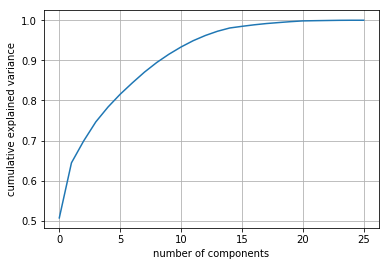

In [23]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()


In [24]:
#Feature extraction
my_model = PCA(n_components = 15)
fit = my_model.fit(X)

print('Explained Variance:', fit.explained_variance_ratio_)
print(fit.components_)
pd.DataFrame(fit.components_, columns = features)


Explained Variance: [0.50700701 0.13747417 0.05438686 0.04764674 0.03698169 0.03193949
 0.02836849 0.02689304 0.02382895 0.02062744 0.01814038 0.01574357
 0.01296653 0.01061069 0.00806362]
[[ 2.13119439e-03 -2.13119439e-03 -3.38304655e-02  9.86907241e-01
   4.95845720e-03  1.34634129e-02  5.24253965e-03 -5.09693849e-02
   4.10153866e-02  8.42274835e-03 -6.21829548e-03  1.00631477e-01
   2.83151411e-02 -8.70726205e-03 -1.68911475e-02  1.09697268e-04
  -6.12462803e-02  7.80895954e-04  3.98385367e-02 -2.88770266e-03
  -1.23821276e-03 -2.29737172e-03  2.69021144e-02  5.18609101e-02
  -1.13750962e-02 -7.15557394e-03]
 [-5.14938389e-03  5.14938389e-03  9.30307384e-01  2.94660461e-02
  -2.32049244e-01 -4.97593787e-02 -8.14462702e-03 -2.94939418e-02
   1.26572935e-01 -7.56096590e-02  3.14194261e-02  2.29590962e-02
   1.40095018e-01  1.28416322e-01 -2.86056001e-02  3.17359192e-03
   1.02791049e-01 -7.28504847e-04 -4.20132187e-02 -1.68542104e-02
   3.21311375e-03  1.12379610e-02 -2.24999954e-02 

,apartment,house,number_of_whole_rooms,floor,number_of_half_rooms,furnish_furnished,furnish_partly_furnished,view_garden,view_panoramic,view_street,...,heating_combination,heating_ceiling,heating_central_heating,heating_electric,heating_floor,heating_circulating,heating_district,available_immediately,condition_of_property_renovated,parking
0,0.002131,-0.002131,-0.033830,0.986907,0.004958,0.013463,0.005243,-0.050969,0.041015,0.008423,...,-0.061246,0.000781,0.039839,-0.002888,-0.001238,-0.002297,0.026902,0.051861,-0.011375,-0.007156
1,-0.005149,0.005149,0.930307,0.029466,-0.232049,-0.049759,-0.008145,-0.029494,0.126573,-0.075610,...,0.102791,-0.000729,-0.042013,-0.016854,0.003213,0.011238,-0.022500,0.022116,-0.036541,0.032669
2,0.005763,-0.005763,-0.074440,0.062370,0.385229,-0.345890,-0.024524,0.111221,0.296423,-0.320251,...,0.313022,-0.000733,-0.075703,0.000270,0.002720,0.000038,0.035381,-0.203425,-0.039465,0.338521
3,-0.000824,0.000824,-0.073131,-0.079843,-0.035092,0.108438,-0.041529,0.262322,0.052823,-0.280923,...,-0.214405,0.001747,0.475220,-0.009951,-0.001001,-0.014358,-0.049371,0.424420,-0.393512,0.184526
4,0.002085,-0.002085,0.118963,-0.066561,0.634505,-0.019228,0.009038,-0.414322,-0.010461,0.460833,...,-0.040928,0.001285,0.106744,-0.009969,0.001119,-0.000976,-0.003807,0.084955,-0.047236,-0.024706
5,-0.008489,0.008489,0.205076,0.040878,0.379035,-0.423618,0.068288,0.411827,-0.442219,-0.002179,...,-0.048180,-0.007868,-0.044750,-0.015993,-0.002546,-0.028361,0.030265,0.125902,-0.209079,-0.088400
6,-0.004054,0.004054,0.004812,-0.043468,0.205625,-0.044462,0.070712,-0.276275,0.493151,-0.407864,...,-0.192409,0.004867,-0.168545,-0.004295,0.005278,0.029967,-0.044734,0.171797,-0.262183,-0.377498
7,-0.006445,0.006445,0.079914,0.030341,0.364340,0.656353,-0.044805,0.338135,-0.151584,-0.268528,...,0.190300,-0.000472,-0.283182,0.004335,-0.004528,0.015259,-0.002898,0.025430,0.173503,-0.129809
8,-0.002515,0.002515,0.098158,-0.028969,0.159391,-0.170761,0.017667,0.101950,0.091358,-0.233051,...,-0.427319,-0.007531,0.337290,0.020568,0.002344,0.038269,0.042724,-0.079907,0.734528,-0.040668
9,0.009719,-0.009719,-0.127008,-0.031228,-0.103220,-0.238937,0.001687,-0.060477,0.091459,-0.021932,...,0.417330,-0.001946,-0.212790,0.001032,-0.008617,-0.053425,0.007075,0.649747,0.378027,0.017720


In [25]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)


(1261, 26)
(1261, 2)


TypeError: You must first set_array for mappable

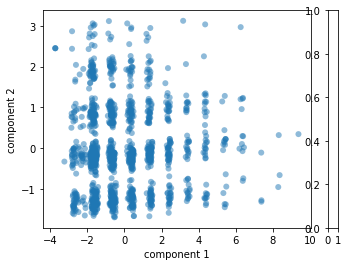

In [27]:
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
